# Motion Algorithm

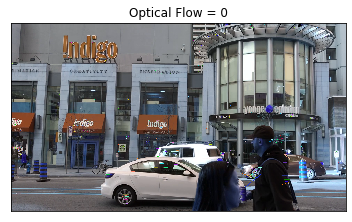

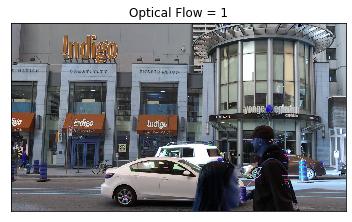

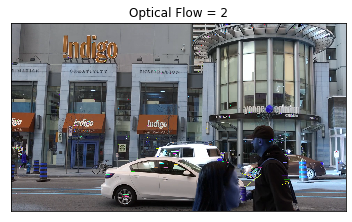

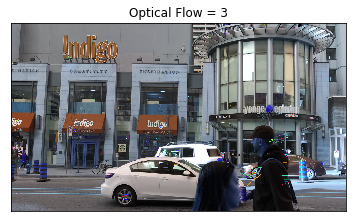

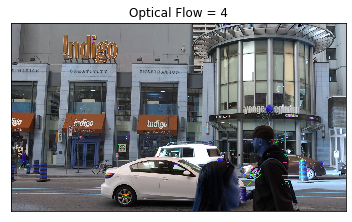

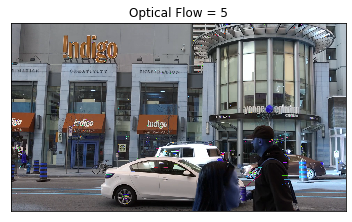

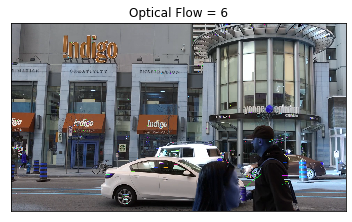

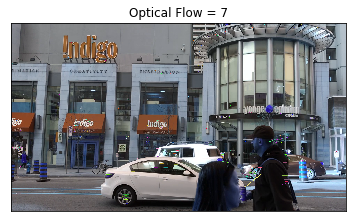

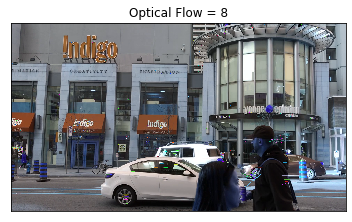

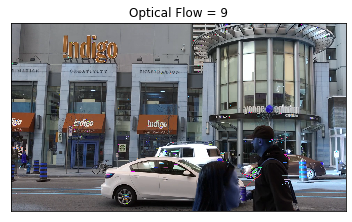

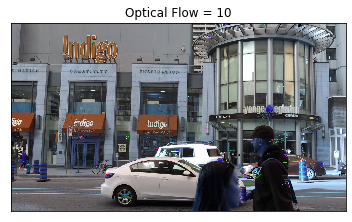

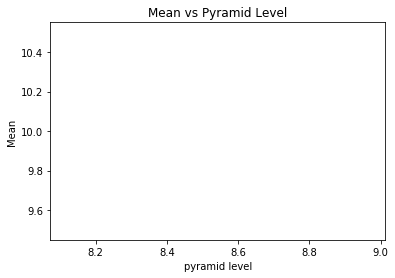

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

corners = cv2.cornerHarris(img1_gray, 2, 3, 0.04)



iteration = 11

for i in range(iteration):
# parameters for lucas kanade optical flow
    lk_params = dict( winSize = (15,15),
                      maxLevel = iteration + 1,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                             10, 0.03))

# find good corners in the first image
    p1 = cv2.goodFeaturesToTrack(img1_gray, 500, 0.01, 7, corners)
    


# calculate optical flow
    p2, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p1, None, **lk_params)
    
    error = []
    if (p2,st,err) == True:
        error.append(err)



# select good points
    good_new = p2[st==1]
    good_old = p1[st==1]

# create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

# create a mask image for drawing purposes
    mask = img1.copy()

# draw the tracks
    for j, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a,b), (c,d), color[j].tolist(), 2)
        
        
# display images
    plt.imshow(mask)
    plt.title("Optical Flow = " + str(i)), plt.xticks([]), plt.yticks([])
    plt.show()
    
# mean = np.mean(error)
# plt.plot(mean, iteration)
# plt.show()
    total_mean = []
    total_pyramid = []

    mean = 0
    count =0
    for j in range(len(st)):
        if (st[j]==1):
            mean += err[j]
            count += 1
    mean = (mean)/count
    total_mean.append(mean)
    total_pyramid.append(i)
    
plt.plot(total_mean, total_pyramid)
plt.title("Mean vs Pyramid Level")
plt.ylabel("Mean")
plt.xlabel("pyramid level")
plt.show()


The optical flow images look almost the same with correspondance to different pyramid levels After optical flow 4, the images are saturated. The optical flow points increase and that is the only significant difference for the initial images(optical flow 0 to optical flow 4)